# Dataset marché des jeux vidéos dématérialisés : Playstation Store

Données réelles des jeux disponibles sur le PlayStation Store sortie depuis le 10 novembre 2020 au 25 octobre 2025  (5640 jeux PS4 et PS5) pour la région Europe / France.

### Provenance

Dataset raw généré via API (accès accordé dans le cadre du projet Alyra)

- GGDeals API: https://gg.deals/api/
- PlatPrices API:  https://platprices.com/developers.php

### Machine learning

 - Proposition A - **Machine learning : prédiction / régression du nombre de jours avant baisse de prix d'un jeu (25%)**, peut servir pour les joueurs (faire des économies) et pour les professionnels du secteur (ajuster les prix par rapport à la concurrence).

 - Proposition B - **Machine learning : prédiction des scores critique et joueurs, classification niveau de qualité d'un jeu**, peut servir dans les deux cas : pour les joueurs (acheter de la qualité) et pour les professionnels du secteur (identifier les genres et fonctionnalitées populaires).

### Visualiser le fichier CSV en ligne

https://drive.google.com/file/d/11BltDe15yhO6tCkQnC9mR7u9jUQYyI95/view?usp=drive_link

### Filtres

- Date de sortie > 10/10/2020
- Prix Jeu > 4.90 €
- Prix DLC > 14.90 €



## Import librairies

In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement du dataset

In [3]:
# Fichier stocké temporairement sur un de mes S3
# url = "https://d3aok2axxchxf9.cloudfront.net/ia/games_data.csv"

url = os.path.join(Path.cwd().parent, "data/processed/games_data.csv")

# Charger les données CSV, Les colonnes Boolean sont au format Int64 (0,1,NaN)
df = pd.read_csv(url,dtype={
    'trophies_count': 'Int64',
    'local_multiplayer_max_players': 'Int64',
    'online_multiplayer_max_players': 'Int64',
    'difficulty': 'Int64',
    'download_size_ps4': 'Int64',
    'download_size_ps5': 'Int64',
    'hours_main_story': 'Int64',
    'hours_completionist': 'Int64',
    'metacritic_critic_score': 'Int64',
    'metacritic_critic_userscore': 'Int64',
    'pegi_rating': 'Int64',
    'days_to_first_price_record': 'Int64',
    'days_to_10_percent_discount': 'Int64',
    'days_to_25_percent_discount': 'Int64',
    'days_to_50_percent_discount': 'Int64',
    'days_to_75_percent_discount': 'Int64',
})


## Résumé détaillé des colonnes

Les valeures à prédire prédiction baisse de prix:
- **days_to_25_percent_discount**

Les valeures à prédire classification notes des joueurs
- **pssstore_stars_rating**
- **pssstore_stars_rating_count**

Les colonnes de prix sont en euros.

In [5]:
def column_summary(df:pd.DataFrame):
    summary = []
    for col in df.columns:
        col_type = df[col].dtype
        non_null = df[col].notna().sum()
        null_count = df[col].isna().sum()
        unique_count = df[col].nunique()

        # Échantillon de valeurs
        sample_values = df[col].dropna().head(1).tolist()

        summary.append({
            'Column': col,
            'Type': str(col_type),
            'Non-Null Count': non_null,
            'Null Count': null_count,
            'Unique Values': unique_count,
            'Sample Values': sample_values
        })

    return pd.DataFrame(summary)

# Afficher le résumé des colonnes
print("=" * 80)
print("Résumé détaillé des colonnes:")
print("=" * 80)
column_summary_df = column_summary(df)
print(column_summary_df.to_string(index=False))
print("\n")

Résumé détaillé des colonnes:
                        Column    Type  Non-Null Count  Null Count  Unique Values                                                                                                                                                          Sample Values
                     game_name  object            5553           0           5553                                                                                                                                                                [#BLUD]
                      id_store  object            5553           0           5553                                                                                                                                 [EP3717-CUSA46883_00-064335689877BLUD]
                short_url_name  object            5553           0           5553                                                                                                                                              

In [33]:
df.head()

,game_name,id_store,short_url_name,publisher,developer,release_date,pssstore_stars_rating,pssstore_stars_rating_count,metacritic_critic_score,metacritic_critic_userscore,...,voice_languages,subtitle_languages,additional_features_tags,base_price,lowest_price,days_to_first_price_record,days_to_10_percent_discount,days_to_25_percent_discount,days_to_50_percent_discount,days_to_75_percent_discount
0,#BLUD,EP3717-CUSA46883_00-064335689877BLUD,game-blud-ps4,Humble Games,Exit 73 Studios,2024-06-18,4.45,215,7,20,...,English,"French,English,German,Portuguese (Brazil),Kore...","Action RPG,Action-Adventure,Dungeon Crawler,Ca...",24.99,14.99,0,64,330,<NA>,<NA>
1,"#Halloween, Super Puzzles Dream",EP8311-PPSA19174_00-0421646910657705,game-halloween-super-puzzles-dream-ps5,e-llusiontertainment,NaN,2023-10-30,1.57,14,<NA>,<NA>,...,NaN,NaN,"Puzzle,Board Game,Strategy",4.99,1.49,3,17,17,17,<NA>
2,#SinucaAttack,EP2005-PPSA06055_00-SINUCA0000000000,game-sinucaattack-ps5,eastasiasoft,NaN,2022-05-19,3.26,72,<NA>,<NA>,...,NaN,NaN,"Puzzle,Platformer,Action",4.99,1.49,2,167,167,167,<NA>
3,"#Wish travel, super puzzle dreams",EP8311-PPSA16513_00-0233078860249892,game-wish-travel-super-puzzle-dreams-ps5,e-llusiontertainment,NaN,2023-05-31,1.55,11,<NA>,<NA>,...,NaN,NaN,"Puzzle,Board Game",4.99,1.49,19,91,91,91,<NA>
4,"#Xmas, Super Puzzles Dream",EP8311-PPSA12662_00-0212989199890961,game-xmas-super-puzzles-dream-ps5,e-llusiontertainment,NaN,2022-12-22,1.17,23,<NA>,<NA>,...,NaN,NaN,"Puzzle,Board Game",4.99,1.49,32,168,168,168,<NA>


In [34]:
df.describe()

,pssstore_stars_rating,pssstore_stars_rating_count,metacritic_critic_score,metacritic_critic_userscore,is_ps4,is_ps5,is_indie,is_vr,is_opti_ps5_pro,is_ps_exclusive,...,hours_main_story,hours_completionist,pegi_rating,base_price,lowest_price,days_to_first_price_record,days_to_10_percent_discount,days_to_25_percent_discount,days_to_50_percent_discount,days_to_75_percent_discount
count,5553.000000,5.553000e+03,1490.0,1490.0,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,...,3372.0,2954.0,4856.0,5553.000000,5553.000000,5553.0,4918.0,4645.0,3420.0,1249.0
mean,3.930023,3.847573e+03,58.236913,58.892617,0.587970,0.861156,0.430218,0.049703,0.032955,0.011165,...,12.575919,13.853419,9.589992,22.635381,10.835204,8.537907,114.764742,145.881593,314.354678,561.835869
std,0.734308,3.670821e+04,29.688322,20.03142,0.492245,0.345815,0.495151,0.217350,0.178535,0.105083,...,34.405549,51.899267,5.457422,16.716087,9.970927,18.979951,121.779298,138.187973,231.053424,347.483321
min,0.000000,0.000000e+00,3.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,3.0,4.990000,0.590000,0.0,0.0,0.0,2.0,5.0
25%,3.600000,2.900000e+01,49.0,50.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.0,3.0,3.0,9.990000,3.990000,0.0,48.0,61.0,147.0,295.0
50%,4.070000,9.800000e+01,71.0,60.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,6.0,7.0,7.0,19.990000,7.990000,1.0,78.0,103.0,266.5,517.0
75%,4.440000,5.610000e+02,79.0,70.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,14.0,14.0,16.0,29.990000,14.990000,4.0,132.0,182.0,413.0,782.0
max,5.000000,1.825682e+06,97.0,90.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1000.0,1500.0,18.0,149.990000,79.990000,184.0,1292.0,1292.0,1645.0,1806.0


### Un aperçu des colonnes non numériques

In [35]:
# Identifier les colonnes non numériques
non_numeric_cols = df.select_dtypes(include=['object']).columns

print("=" * 100)
print(f"APERÇU DES COLONNES NON NUMÉRIQUES ({len(non_numeric_cols)} colonnes)")
print("=" * 100)
print("\n")

for col in non_numeric_cols:
    print(f"Colonne: {col}")
    print("-" * 100)

    # Nombre de valeurs uniques
    unique_count = df[col].nunique()
    non_null = df[col].notna().sum()
    null_count = df[col].isna().sum()

    print(f"   • Valeurs uniques: {unique_count}")
    print(f"   • Valeurs non-nulles: {non_null} ({non_null/len(df)*100:.1f}%)")
    print(f"   • Valeurs nulles: {null_count} ({null_count/len(df)*100:.1f}%)")

    # Top 10 des valeurs les plus fréquentes
    if unique_count > 0:
        print(f"\n  Top 5 des valeurs les plus fréquentes:")
        value_counts = df[col].value_counts().head(5)
        for idx, (value, count) in enumerate(value_counts.items(), 1):
            percentage = (count / len(df)) * 100
            # Tronquer les valeurs trop longues
            display_value = str(value)[:80] + "..." if len(str(value)) > 80 else str(value)
            print(f"      {idx}. {display_value}")
            print(f"         → {count} occurrences ({percentage:.2f}%)")

    # Échantillon de valeurs
    print(f"\n  Échantillon de valeurs (5 premières non-nulles):")
    samples = df[col].dropna().head(5).tolist()
    for idx, sample in enumerate(samples, 1):
        display_sample = str(sample)[:100] + "..." if len(str(sample)) > 100 else str(sample)
        print(f"      {idx}. {display_sample}")

    print("\n")

APERÇU DES COLONNES NON NUMÉRIQUES (12 colonnes)


Colonne: game_name
----------------------------------------------------------------------------------------------------
   • Valeurs uniques: 5553
   • Valeurs non-nulles: 5553 (100.0%)
   • Valeurs nulles: 0 (0.0%)

  Top 5 des valeurs les plus fréquentes:
      1. #BLUD
         → 1 occurrences (0.02%)
      2. #Halloween, Super Puzzles Dream
         → 1 occurrences (0.02%)
      3. #SinucaAttack
         → 1 occurrences (0.02%)
      4. #Wish travel, super puzzle dreams
         → 1 occurrences (0.02%)
      5. #Xmas, Super Puzzles Dream
         → 1 occurrences (0.02%)

  Échantillon de valeurs (5 premières non-nulles):
      1. #BLUD
      2. #Halloween, Super Puzzles Dream
      3. #SinucaAttack
      4. #Wish travel, super puzzle dreams
      5. #Xmas, Super Puzzles Dream


Colonne: id_store
----------------------------------------------------------------------------------------------------
   • Valeurs uniques: 5553
   • Valeu

### Création de caractéristiques

#### Retour métier des consultants sur la prédiction du nombre de jours avant baisse de prix

- **Temporalité de sortie concurrentes :** C'est une feature que je pourrai peut être extraire du dataset (pour une fenêtre de date commune, lister le nombre de jeux avec même genre et de de niveau AAA) . Mais une analyse humaine semble importante.

- **Prix peut baisser plus rapidement s’il s’agit d’un Remastered:** c'est une feature que je peux retrouver dans le nom du jeu, les tags. Je pourrai également trouver cette information dans la description du jeu (mot clé remaster mais attention au contexte de la phrase)

- **Les jeux dont le succès à une incidence sur la pérénité du studio:** C'est une feature que je vais intégrer dans ma prédiction, pour un jeu avoir l'information si le studio de developpement et l'éditeur sont important dans l'industrie:

  - MAJEURE (SONY, CAPCOM, UBISOFT etc)
  - ACTIF (nombre de jeux > 3 par exemple)
  - AUTRES

- **Cycle console:** jeux sortie au debut, milieu ou fin de vie de la console
  - C'est une feature que je peux déduire des données et intégrer (en fonction de la date de sortie de la console PS4 et sortie PS5)

- **Nombre de DLCs:** La sortie d'une extension va forcement avoir une incidence sur le prix du jeu de base
  - Le nombre de DLCs sortie est présent dans les données
  - Je pourrai trouver les dates de sortie d'une extension d'un jeu si j'avais plus de temps de developpement.

- **Le jeu contient-il des microtransactions:** Achat in game rentable on peut se permettre de baisser le prix du jeu de base rapidement
  - Le nombre de microtransactions disponible à l'achat pour un jeu est présent dans les données

- **Fait-il parti d'une série de suite:** Typiquement les jeux de sport annuelle
  - Le nombre de jeux faisant partis de la même série est présent dans les données. (FIFA 2022 - FIFA 2023 etc.)

- **Exclusivité ps5** Le prix aura tendance à moins baisser (il faut que le jeu soit rentable, on peut pas se rattraper sur les ventes des jeux des autres consoles / pc)
  - L'information est présente dans les données

## EDA Charts

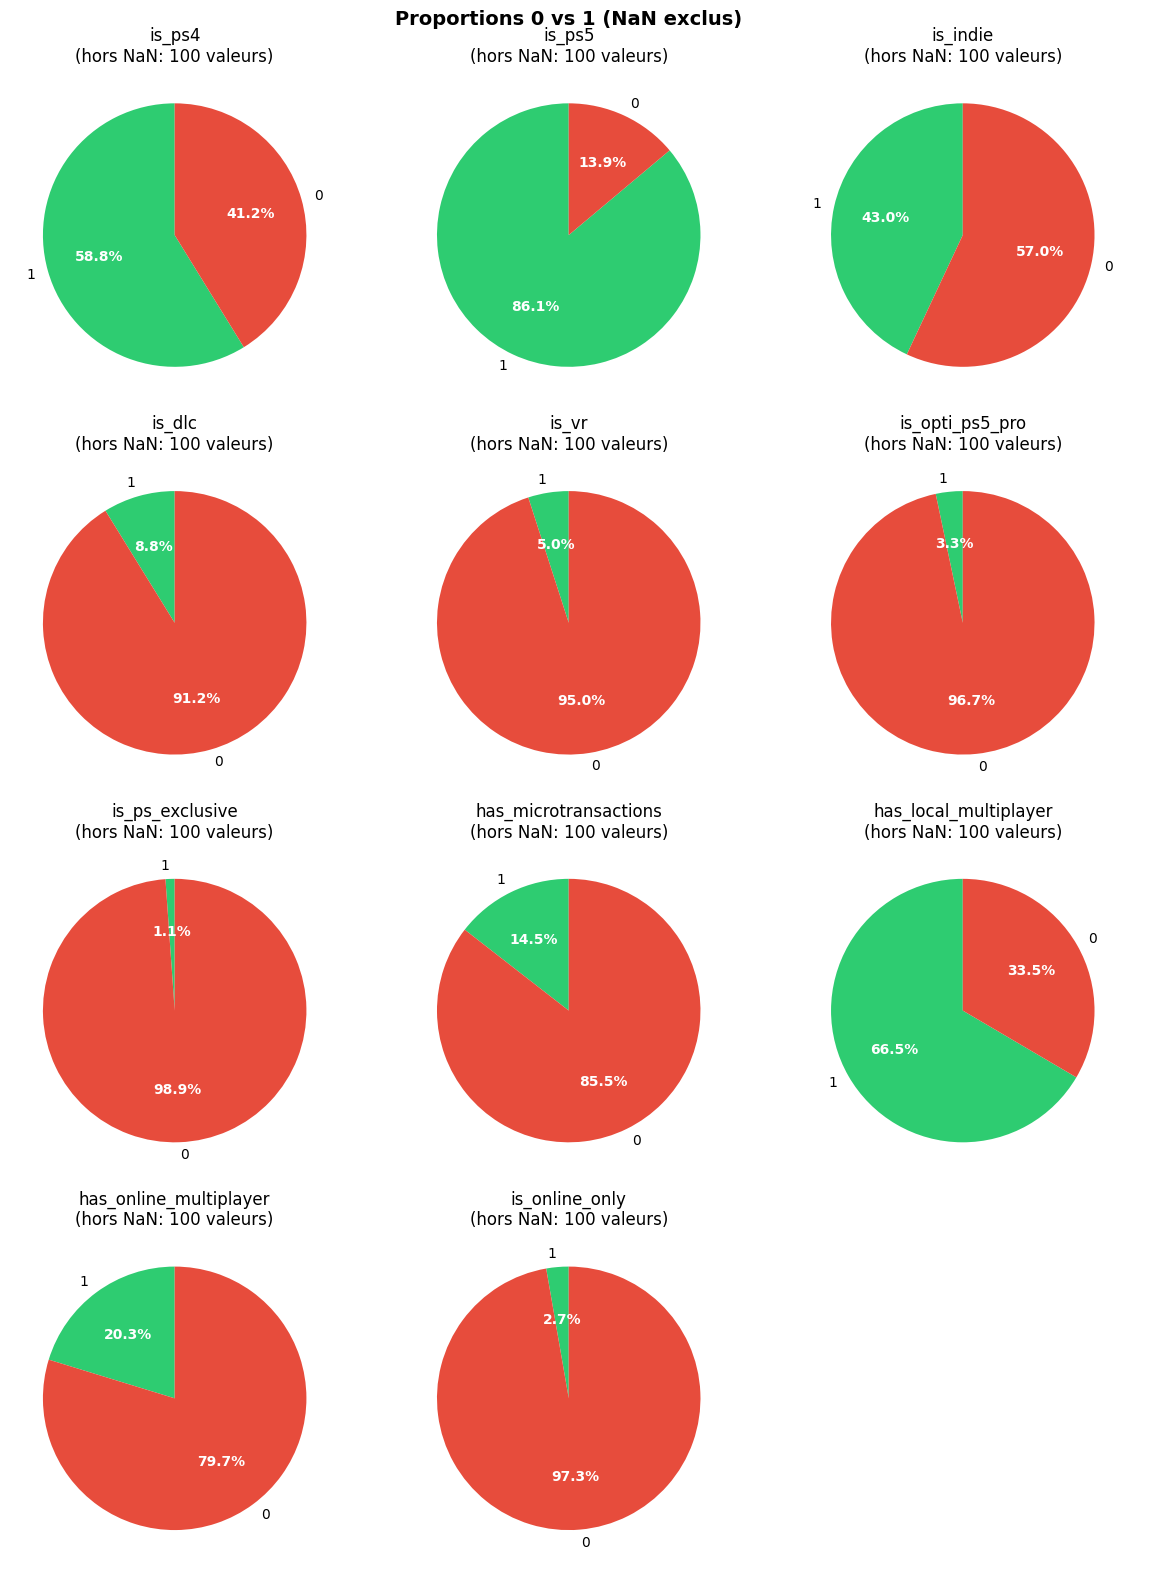

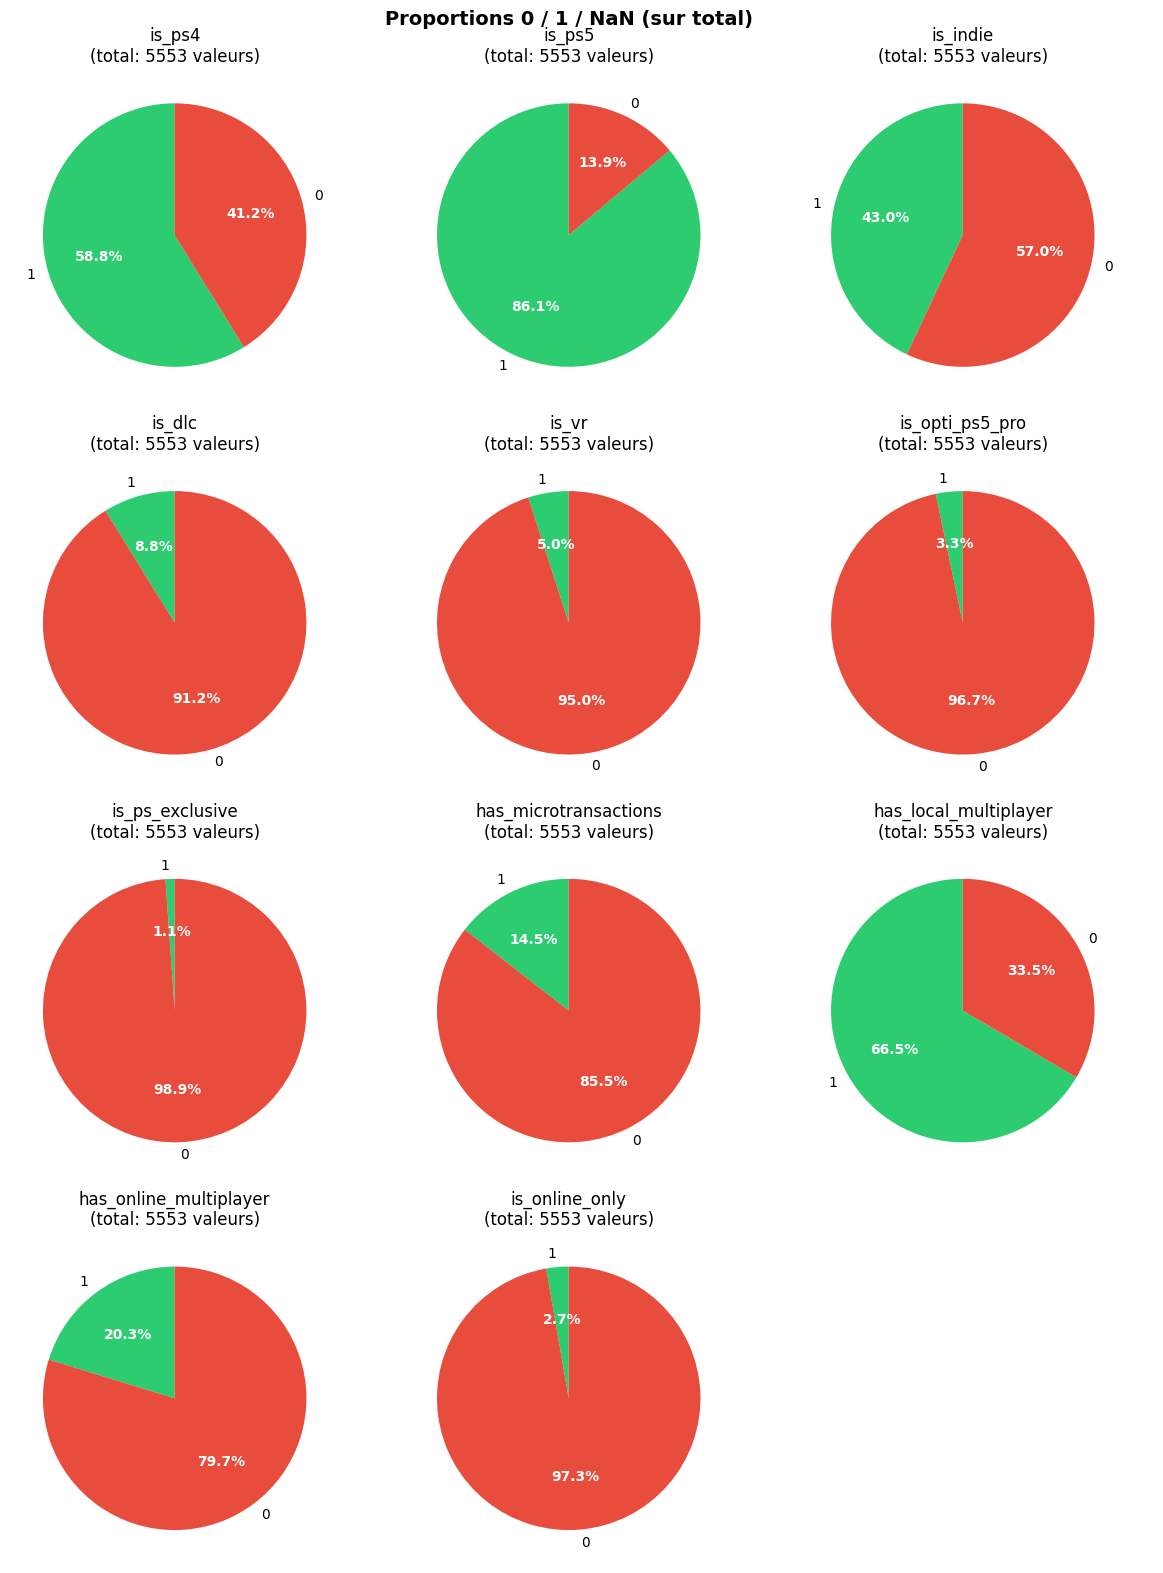

In [36]:
# Identifier les colonnes binaires
binary_cols = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]

# Calculer les proportions pour chaque colonne
proportions = []
for col in binary_cols:
    total = len(df[col].dropna())
    count_1 = (df[col] == 1).sum()
    count_0 = (df[col] == 0).sum()
    count_nan = df[col].isna().sum()
    
    proportions.append({
        'colonne': col,
        '1': count_1 / len(df) * 100 if len(df) > 0 else 0,
        '0': count_0 / len(df) * 100 if len(df) > 0 else 0,
        'NaN': count_nan / len(df) * 100 if len(df) > 0 else 0
    })

prop_df = pd.DataFrame(proportions)


n_cols = len(binary_cols)
n_rows = (n_cols + 2) // 3  # 3 colonnes par ligne
fig, axes = plt.subplots(n_rows, min(n_cols, 3), figsize=(12, 4*n_rows))

if n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten() if n_cols > 3 else axes

colors_binary = ['#2ecc71', '#e74c3c']

for i, col in enumerate(binary_cols):
    values = [prop_df.iloc[i]['1'], prop_df.iloc[i]['0']]
    labels = ['1', '0']
    
    # Calculer les pourcentages sans les NaN
    total_valid = sum(values)
    if total_valid > 0:
        pct_values = [v/total_valid*100 for v in values]
        
        wedges, texts, autotexts = axes[i].pie(pct_values, labels=labels, 
                                                 colors=colors_binary,
                                                 autopct='%1.1f%%', startangle=90)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    
    axes[i].set_title(f'{col}\n(hors NaN: {total_valid:.0f} valeurs)')

# Masquer les axes inutilisés
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Proportions 0 vs 1 (NaN exclus)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ===== OPTION 2B: Graphiques circulaires - Avec inclusion des NaN =====
fig, axes = plt.subplots(n_rows, min(n_cols, 3), figsize=(12, 4*n_rows))

if n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten() if n_cols > 3 else axes

colors_with_nan = ['#2ecc71', '#e74c3c', '#95a5a6']

for i, col in enumerate(binary_cols):
    values = [prop_df.iloc[i]['1'], prop_df.iloc[i]['0'], prop_df.iloc[i]['NaN']]
    labels = ['1', '0', 'NaN']
    
    # Filtrer les valeurs nulles
    filtered = [(v, l, c) for v, l, c in zip(values, labels, colors_with_nan) if v > 0]
    if filtered:
        vals, labs, cols = zip(*filtered)
        
        wedges, texts, autotexts = axes[i].pie(vals, labels=labs, colors=cols,
                                                 autopct='%1.1f%%', startangle=90)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
    
    axes[i].set_title(f'{col}\n(total: {len(df)} valeurs)')

# Masquer les axes inutilisés
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.suptitle('Proportions 0 / 1 / NaN (sur total)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
